# -----------------Module 2(Data cleaning and Data Pre-processing)-------------------

# lodading legitimate User Data 

In [1]:
import pandas as pd
Total_leg_data = pd.read_csv('Leg_data.csv')
Total_leg_data.fillna(0, inplace=True)
Total_leg_data.shape

(11118, 21)

# drow bar plot to see tweet come from the which locations

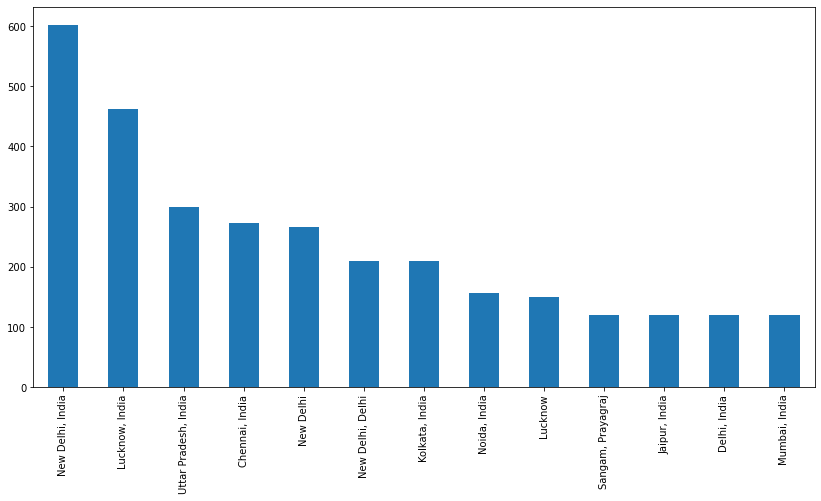

In [2]:
location_data = Total_leg_data['UserLocation'].value_counts()
location_data[2:15].plot(kind='bar', figsize=(14,7))

# draw for a word how many times it used in tweets
# Hypothesis is Legitimate users user very less compare to spammer

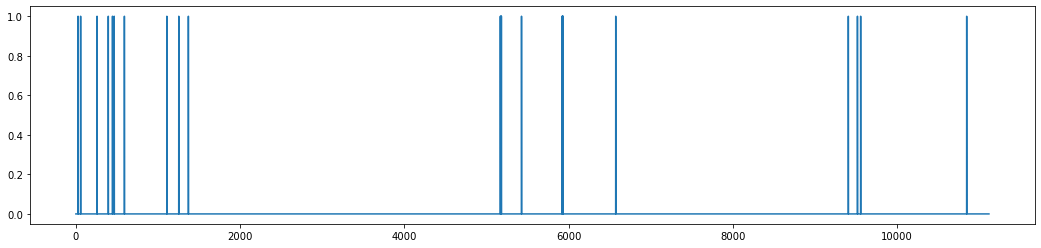

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,4)
plt.rcParams['font.family'] = 'sans-serif'
text = Total_leg_data['TextData']
is_sex = text.str.contains('sex')
is_sex=is_sex.astype(float)
is_sex.plot()

# Save Followers count

In [7]:
temp1 = Total_leg_data[["UserFollowersCount"]]
temp1.to_csv('C:/Users/asha/Desktop/Final Year Project Phase 2/Phase 2/Step2/userfollowerscount.csv', sep=',',encoding='utf8')

# Retweet ratio also will be higher compare to spammer user

In [8]:
Total_leg_data[['RetweetCount']] = Total_leg_data[['RetweetCount']].astype(float)
Total_leg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11118 non-null  int64  
 1   Unnamed: 0.1           11118 non-null  int64  
 2   TwittID                11118 non-null  int64  
 3   TextData               11118 non-null  object 
 4   TweetCreatedAt         11118 non-null  object 
 5   RetweetCount           11118 non-null  float64
 6   TweetFavouriteCount    11118 non-null  int64  
 7   TweetSource            11118 non-null  object 
 8   UserID                 11118 non-null  int64  
 9   UserScreenName         11118 non-null  object 
 10  UserName               11118 non-null  object 
 11  UserCreatedAt          11118 non-null  object 
 12  UserDescription        11118 non-null  object 
 13  UserDescriptionLength  11118 non-null  int64  
 14  UserFollowersCount     11118 non-null  int64  
 15  Us

# to see how many people have zero tweet

In [9]:
Total_leg_data = Total_leg_data[Total_leg_data.TweetCount!=0]
len(Total_leg_data[Total_leg_data.TweetCount<30])

378

# adding New feature

In [10]:
Total_leg_data.loc[:,"AvgHashtag"] = (Total_leg_data.groupby('UserID')["HashtagCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgURLCount"] = (Total_leg_data.groupby('UserID')["HttpCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgMention"] = (Total_leg_data.groupby('UserID')["MentionCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgRetweet"] = (Total_leg_data.groupby('UserID')["RetweetCount"].transform('sum'))/30
Total_leg_data.loc[:,"AvgFavCount"] = (Total_leg_data.groupby('UserID')["TweetFavouriteCount"].transform('sum'))/30

# Selecting Repeted columns only and droping the repeted rows


In [13]:
unique_leg_row = Total_leg_data[["UserID", "UserScreenName", "UserCreatedAt", "UserDescriptionLength","UserFollowersCount", "UserFriendsCount", "UserLocation", "AvgHashtag", "AvgURLCount", "AvgMention", "AvgRetweet", "AvgFavCount", "TweetCount"]]
leg_data = unique_leg_row.drop_duplicates()
leg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 11088
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 375 non-null    int64  
 1   UserScreenName         375 non-null    object 
 2   UserCreatedAt          375 non-null    object 
 3   UserDescriptionLength  375 non-null    int64  
 4   UserFollowersCount     375 non-null    int64  
 5   UserFriendsCount       375 non-null    int64  
 6   UserLocation           375 non-null    object 
 7   AvgHashtag             375 non-null    float64
 8   AvgURLCount            375 non-null    float64
 9   AvgMention             375 non-null    float64
 10  AvgRetweet             375 non-null    float64
 11  AvgFavCount            375 non-null    float64
 12  TweetCount             375 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 41.0+ KB


#  Saving the reduced legitimate data

In [16]:
fre = leg_data["UserFriendsCount"]
fre.to_csv("C:/Users/asha/Desktop/Final Year Project Phase 2/Phase 2/Step2/userfriendscount.csv", sep=',',encoding='utf8')

# Datatype conversion from object to float


In [17]:
leg_data[['UserFriendsCount']] = leg_data[['UserFriendsCount']].astype(float)
leg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 11088
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 375 non-null    int64  
 1   UserScreenName         375 non-null    object 
 2   UserCreatedAt          375 non-null    object 
 3   UserDescriptionLength  375 non-null    int64  
 4   UserFollowersCount     375 non-null    int64  
 5   UserFriendsCount       375 non-null    float64
 6   UserLocation           375 non-null    object 
 7   AvgHashtag             375 non-null    float64
 8   AvgURLCount            375 non-null    float64
 9   AvgMention             375 non-null    float64
 10  AvgRetweet             375 non-null    float64
 11  AvgFavCount            375 non-null    float64
 12  TweetCount             375 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 41.0+ KB


# Add a Column to Legitimate Data that this is not Spam =0

In [25]:
leg_data.loc[:, "SpammerOrNot"]=0
leg_data.tail()

C:\Users\asha\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,UserID,UserScreenName,UserCreatedAt,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot
10968,767677235805511680,mediaamantra,2016-08-22 10:58:10,128,1566,958.0,"Lucknow, India",0.400000,1.0,0.600000,3.400000,4.533333,14896,0
10998,67378160,DainikBhaskar,2009-08-20 18:04:36,76,634524,46.0,India,8.933333,4.0,1.333333,12.533333,87.900000,119712,0
11028,461841349,ZeeNewsHindi,2012-01-12 07:52:31,110,1868923,22.0,India,2.033333,2.9,1.500000,244.966667,992.166667,181029,0
11058,98362607,News18India,2009-12-21 12:11:21,47,1035839,89.0,India,2.033333,2.0,1.566667,20.733333,100.533333,285844,0
11088,3266889528,allahabdtraffic,2015-07-03 09:06:39,138,7608,146.0,"Allahabad, India",0.733333,0.7,1.966667,35.100000,2.633333,4937,0


In [26]:
leg_data["TweetCount"].describe()

count       375.000000
mean      41288.162667
std       93281.144477
min           1.000000
25%         324.000000
50%        3883.000000
75%       20650.000000
max      596778.000000
Name: TweetCount, dtype: float64

# Now Loading Spammer Data

In [27]:
Total_spam_data = pd.read_csv("Spam_data.csv")
Total_spam_data.fillna(0, inplace=True)
Total_spam_data.shape

(5394, 21)

# drow bar plot to see tweet come from the which locations

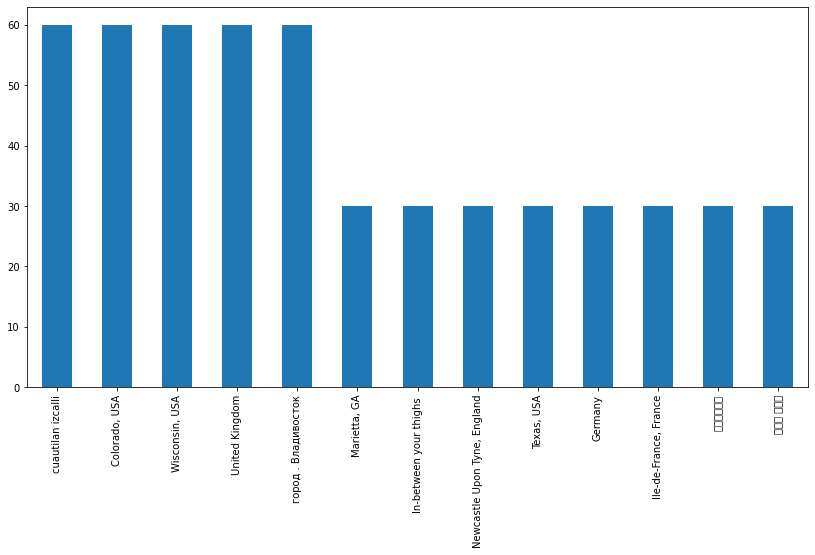

In [22]:
%matplotlib inline
location_data = Total_spam_data['UserLocation'].value_counts()
location_data[2:15].plot(kind='bar', figsize=(14,7))

# By Analyize Tweet I find that there is a lot of volgor word used by spam user compare to legitimate users

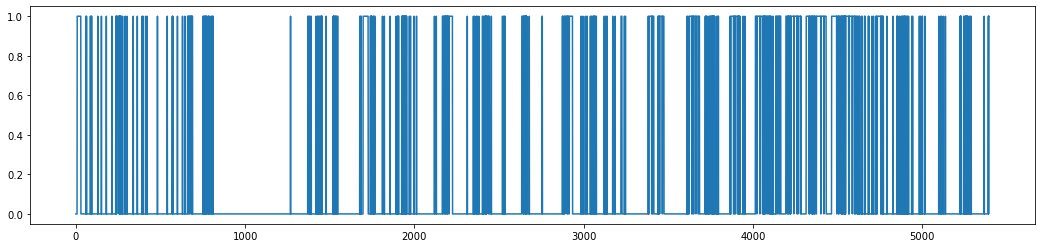

In [28]:
import matplotlib.pyplot as plt
import string as str
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,4)
plt.rcParams['font.family'] = 'sans-serif'
text = Total_spam_data['TextData']
is_sex = text.str.contains('sex')
is_sex=is_sex.astype(float)
is_sex.plot()

In [29]:
Total_spam_data=Total_spam_data.fillna(0)
Total_spam_data.shape

(5394, 21)

In [30]:
temp2 = Total_spam_data[["UserFollowersCount"]]
temp2.to_csv('C:/Users/asha/Desktop/Final Year Project Phase 2/Phase 2/Step2/userfollowerscount1.csv', sep=',',encoding='utf8')

# convert retweetcount object to float

In [31]:
Total_spam_data[['RetweetCount']] = Total_spam_data[['RetweetCount']].astype(float)
Total_spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5394 non-null   int64  
 1   Unnamed: 0.1           5394 non-null   int64  
 2   TwittID                5394 non-null   int64  
 3   TextData               5394 non-null   object 
 4   TweetCreatedAt         5394 non-null   object 
 5   RetweetCount           5394 non-null   float64
 6   TweetFavouriteCount    5394 non-null   int64  
 7   TweetSource            5394 non-null   object 
 8   UserID                 5394 non-null   int64  
 9   UserScreenName         5394 non-null   object 
 10  UserName               5394 non-null   object 
 11  UserCreatedAt          5394 non-null   object 
 12  UserDescription        5394 non-null   object 
 13  UserDescriptionLength  5394 non-null   int64  
 14  UserFollowersCount     5394 non-null   int64  
 15  User

# to see how many people have zero tweet

In [32]:
Total_spam_data = Total_spam_data[Total_spam_data.TweetCount!=0]
len(Total_spam_data[Total_spam_data.TweetCount<30])

54

# Adding new Extra feature 

In [33]:
Total_spam_data.loc[:,'AvgHashtag'] = (Total_spam_data.groupby('UserID')["HashtagCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgURLCount'] = (Total_spam_data.groupby('UserID')["HttpCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgMention'] = (Total_spam_data.groupby('UserID')["MentionCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgRetweet'] = (Total_spam_data.groupby('UserID')["RetweetCount"].transform('sum'))/30
Total_spam_data.loc[:,'AvgFavCount'] = (Total_spam_data.groupby('UserID')["TweetFavouriteCount"].transform('sum'))/30

In [34]:
Total_spam_data.tail(4)

,Unnamed: 0,Unnamed: 0.1,TwittID,TextData,TweetCreatedAt,RetweetCount,TweetFavouriteCount,TweetSource,UserID,UserScreenName,...,UserLocation,HttpCount,HashtagCount,MentionCount,TweetCount,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount
5390,5390,746,1120300621578551296,RT @s___fire: your sex life is going bad ? you...,2019-04-22 12:17:37,22.0,0,Twitter for Android,1055696622,Giovannini8,...,0,1,0,1,150737,0.833333,1.766667,3.6,138.733333,0.0
5391,5391,747,1120300607309524992,RT @s___fire: Find your fantasy here and make ...,2019-04-22 12:17:33,18.0,0,Twitter for Android,1055696622,Giovannini8,...,0,1,0,1,150737,0.833333,1.766667,3.6,138.733333,0.0
5392,5392,748,1120300592046444545,RT @sexole: ONLINE EN https://t.co/wkT9BMovtL ...,2019-04-22 12:17:29,1.0,0,Twitter for Android,1055696622,Giovannini8,...,0,2,2,1,150737,0.833333,1.766667,3.6,138.733333,0.0
5393,5393,749,1120300537314979840,RT @DomUrch: @irinagomez60\n@HQPornHQ\n@Erotik...,2019-04-22 12:17:16,121.0,0,Twitter for Android,1055696622,Giovannini8,...,0,0,0,11,150737,0.833333,1.766667,3.6,138.733333,0.0


# Selecting Repeted columns only and droping the repeted rows

In [35]:
unique_spam_row = Total_spam_data[["UserID", "UserScreenName", "UserCreatedAt", "UserDescriptionLength","UserFollowersCount", "UserFriendsCount", "UserLocation", "AvgHashtag", "AvgURLCount", "AvgMention", "AvgRetweet", "AvgFavCount", "TweetCount"]]
spam_data = unique_spam_row.drop_duplicates()
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 5364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 177 non-null    int64  
 1   UserScreenName         177 non-null    object 
 2   UserCreatedAt          177 non-null    object 
 3   UserDescriptionLength  177 non-null    int64  
 4   UserFollowersCount     177 non-null    int64  
 5   UserFriendsCount       177 non-null    int64  
 6   UserLocation           177 non-null    object 
 7   AvgHashtag             177 non-null    float64
 8   AvgURLCount            177 non-null    float64
 9   AvgMention             177 non-null    float64
 10  AvgRetweet             177 non-null    float64
 11  AvgFavCount            177 non-null    float64
 12  TweetCount             177 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 19.4+ KB


# Saving the reduced Spammer data

In [36]:
fre = spam_data["UserFriendsCount"]
fre.to_csv("C:/Users/asha/Desktop/Final Year Project Phase 2/Phase 2/Step2/userfriendscount1.csv", sep=',',encoding='utf8')

#   userfriendscount Datatype conversion from object to float

In [38]:
spam_data[['UserFriendsCount']] = spam_data[['UserFriendsCount']].astype(float)
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 5364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 177 non-null    int64  
 1   UserScreenName         177 non-null    object 
 2   UserCreatedAt          177 non-null    object 
 3   UserDescriptionLength  177 non-null    int64  
 4   UserFollowersCount     177 non-null    int64  
 5   UserFriendsCount       177 non-null    float64
 6   UserLocation           177 non-null    object 
 7   AvgHashtag             177 non-null    float64
 8   AvgURLCount            177 non-null    float64
 9   AvgMention             177 non-null    float64
 10  AvgRetweet             177 non-null    float64
 11  AvgFavCount            177 non-null    float64
 12  TweetCount             177 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 19.4+ KB


# Add a Column to Spammer Data that this is Spam =1

In [42]:
spam_data.loc[:, "SpammerOrNot"]=1
spam_data.head()

C:\Users\asha\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,UserID,UserScreenName,UserCreatedAt,UserDescriptionLength,UserFollowersCount,UserFriendsCount,UserLocation,AvgHashtag,AvgURLCount,AvgMention,AvgRetweet,AvgFavCount,TweetCount,SpammerOrNot
0,1119864633110794240,Murat41222943,2019-04-21 07:25:09,139,17,761.0,İstanbul Beylikdüzü,0.000000,0.966667,0.866667,0.000000,0.466667,207,1
30,1099556638401486849,Ar1_sa3,2019-02-24 06:28:26,7,96,111.0,0,0.466667,0.533333,0.000000,0.000000,1.200000,139,1
60,978987895301263360,Stew45641594,2018-03-28 13:31:17,0,61,671.0,"Miami, FL/jamaica",1.100000,0.833333,1.133333,196.933333,0.000000,1090,1
90,1066182466669547520,fakesmilesonly,2018-11-24 04:11:23,47,15612,5799.0,0,0.000000,0.333333,0.300000,2376.200000,7666.333333,205,1
120,1049690686465949696,BhonestTo,2018-10-09 15:58:56,160,2380,3719.0,Canton Ohio,0.400000,0.533333,1.266667,985.433333,0.000000,5485,1


# Describe both legitimate user and spammer user of Twitter count

In [43]:
spam_data["TweetCount"].describe()

count    1.770000e+02
mean     2.532717e+04
std      9.549593e+04
min      1.000000e+00
25%      6.410000e+02
50%      4.744000e+03
75%      1.185200e+04
max      1.150378e+06
Name: TweetCount, dtype: float64

In [49]:
leg_data["TweetCount"].describe()

count       375.000000
mean      41288.162667
std       93281.144477
min           1.000000
25%         324.000000
50%        3883.000000
75%       20650.000000
max      596778.000000
Name: TweetCount, dtype: float64

# Merging the legitimate and spammer data

In [48]:
frames = [leg_data, spam_data]
Total_data = pd.concat(frames, axis=0, sort=False)
Total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 5364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 552 non-null    int64  
 1   UserScreenName         552 non-null    object 
 2   UserCreatedAt          552 non-null    object 
 3   UserDescriptionLength  552 non-null    int64  
 4   UserFollowersCount     552 non-null    int64  
 5   UserFriendsCount       552 non-null    float64
 6   UserLocation           552 non-null    object 
 7   AvgHashtag             552 non-null    float64
 8   AvgURLCount            552 non-null    float64
 9   AvgMention             552 non-null    float64
 10  AvgRetweet             552 non-null    float64
 11  AvgFavCount            552 non-null    float64
 12  TweetCount             552 non-null    int64  
 13  SpammerOrNot           552 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 64.7+ KB

In [47]:
Total_data.reset_index()
Total_data.to_csv('Total_data.csv', sep=',', encoding='utf8')